# Project 2 (Admissions data)

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [3]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [4]:
#Read in data from source 
df_raw = pd.read_csv("./admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset? 


In [74]:
# find number of observations in dataset
len(df_raw.index)

400

Answer: 400

#### Question 2. Create a summary table

In [6]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The GRE scores possibly have a larger STD than GPA due to confounders that would influence GRE scores, but not GPA scores.  For example, the GRE score requirements may be different for various graduate degree programs at the university, thus introducing the spread in scores.  Other factors such as the range of educational backgrounds, study habits, when the student took the test and demographics could also account for the range in GRE scores.  The GPAs of those same students may have a lower STD possibly because there may be a minimum GPA requirement for applying to the graduate school.

#### Question 4. Drop data points with missing data


In [17]:
# discover if there are any missing values in dataset
df_raw.isnull().values.any()

True

In [78]:
# show observations with null values
null_data = df_raw[df_raw.isnull().any(axis=1)]
null_data

,admit,gre,gpa,prestige
187,0,NaN,NaN,2
212,0,NaN,2.87,2
236,1,660,NaN,NaN


In [22]:
# drop data points with missing data
df_no_missing = df_raw.dropna()
df_no_missing.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [23]:
# discover if there are any missing values in dataset
df_no_missing.isnull().values.any()

False

In [24]:
df_no_missing.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: The isnull function was used to verify the missing data was removed.  After running the describe function on the newly "cleaned" dataset, the summary details still match the original; this may not be the best indicator. 

#### Question 6. Create box plots for GRE and GPA

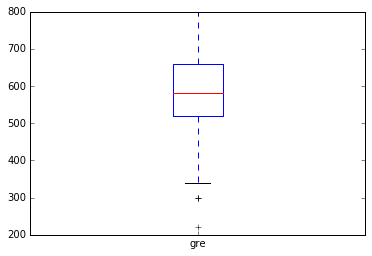

In [50]:
#GRE BOXPLOT
df_no_missing['gre'].plot(kind='box')

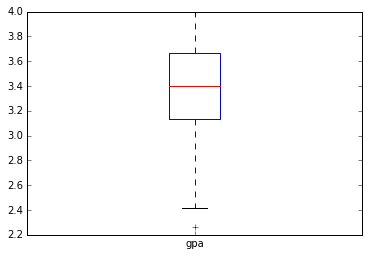

In [49]:
# GPA BOXPLOT
df_no_missing['gpa'].plot(kind='box')

#### Question 7. What do the plots show?

Answer: Both GPA and GRE are skewed left

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d3a6f50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d8583d0>]], dtype=object)

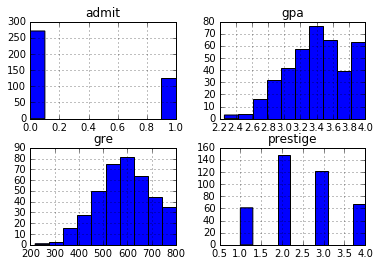

In [48]:
df_no_missing.hist()

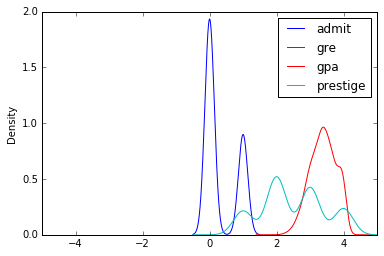

In [42]:
# plot the distribution of each variable 
df_no_missing.plot(kind="density",xlim=(-5,5)) 

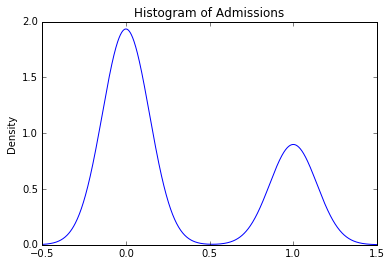

In [54]:
df_no_missing["admit"].plot(kind="density", title='Histogram of Admissions')

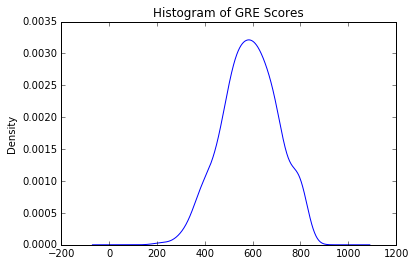

In [55]:
df_no_missing["gre"].plot(kind="density",title='Histogram of GRE Scores')

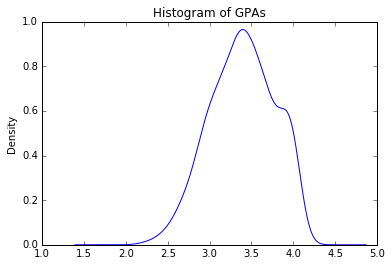

In [69]:
df_no_missing.gpa.plot(kind="density", title='Histogram of GPAs')

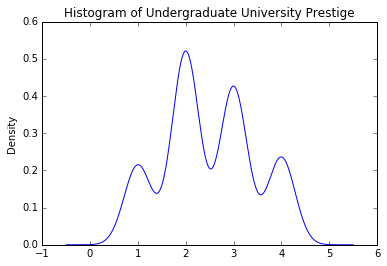

In [57]:
df_no_missing["prestige"].plot(kind="density", title='Histogram of Undergraduate University Prestige')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: I would say yes because, though there is slight skewing, the bulk of the observations are pretty close to the mean.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: I'm not sure, we would ee could use continuity correction (per google) and run

#### Question 11. Which of our variables are potentially colinear? 

In [83]:
# create a correlation matrix for the data
df_no_missing.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: none of the values are closely correlated


#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Run significance tests on values

#### Question 14. What is your hypothesis? 

Answer: 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data